# **Perkenalan Analisis Data Eksploratif**




*   by: Yayan Riyanto *edited* by Widya Pranayoga
* *Ministry of Finance Data Analytics Community (MoF-DAC)*



---



## Definisi
> Proses Analisis Data Eksploratif (*Exploratory Data Analysis*/EDA) adalah suatu usaha untuk memahami data dengan melakukan penyelidikan awal untuk:
*   Menemukan pola,
*   Mencari anomali,
*   Mengetes asumsi, dan
*   Menguji hipotesis

> Dengan menggunakan *visualisasi data* dan *ringkasan statistik* [1](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)

> EDA adalah bagian dari *Data Understanding* dari kerangka "CRISP-DM".

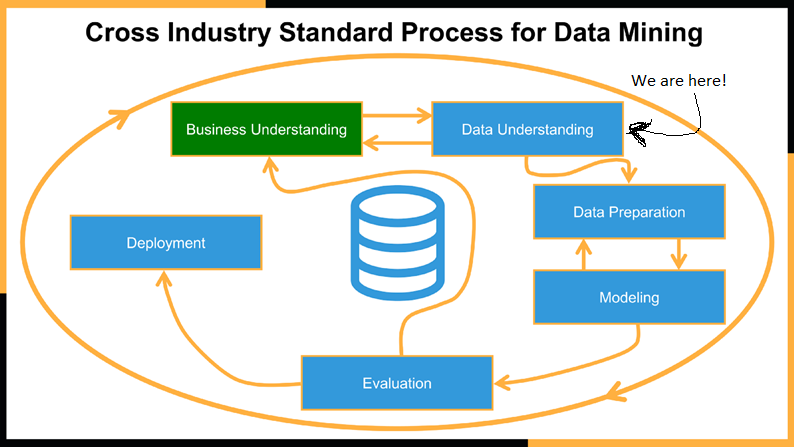



## Tujuan EDA [2](http://www.mat.ufrgs.br/~viali/estatistica/mat2274/material/textos/2237638.pdf)
1. Menarik hipotesis tentang penyebab fenomena yang diamati
2. Menilai asumsi yang menjadi dasar inferensi statistik
3. Mendukung pemilihan teknik statistik yang tepat
4. Memberikan dasar untuk pengumpulan data lebih lanjut


# Kerangka Proses EDA 


> Proses EDA dapat diilustrasikan dalam langkah-langkah sebagai berikut[3](https://www.researchgate.net/publication/329930775_A_comprehensive_review_of_tools_for_exploratory_analysis_of_tabular_industrial_datasets) :

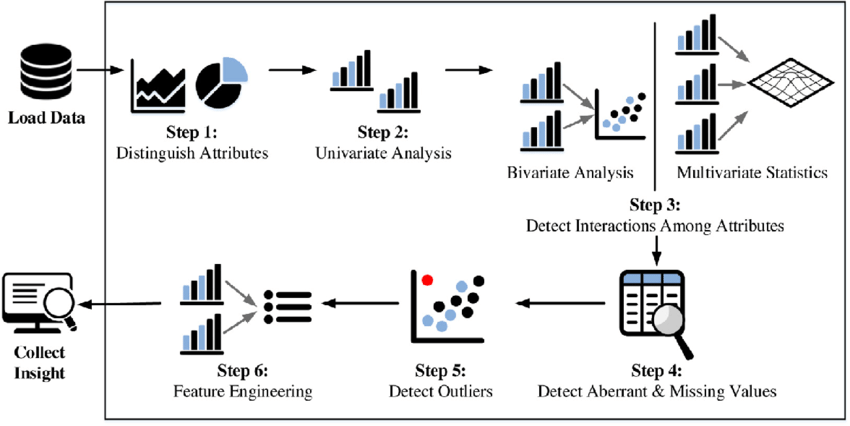

# EDA dengan Dataset Titanic

Dataset Titanic berisi data rincian penumpang Kapal Titanic yang tenggelam secara tragis pada tahun 1912.[4](https://www.kaggle.com/c/titanic/data)

#### Tujuan
1. Memahami hubungan antara rincian data dari penumpang yang selamat dan penumpang yang tidak selamat
2. Melakukan prediksi selamat/tidak selamat berdasarkan rincian data penumpang

## Persiapan


> *   Install dan import pandas
> *   Import dataset "Titanic" dan simpan dalam dataframe "data"





In [2]:
#pip install pandas #ini diperlukan apabila berlum terinstall pandas
import pandas as pd 
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv") #menyimpan dataset titanic dalam dataframe bernama 'data'
data #mempelihatkan 5 isian awal dan akhir dari 'data'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Penjelasan terkait setiap kolom bisa di cek [disini](https://data.world/nrippner/titanic-disaster-dataset)

## Jelajahi Atribut

### 1. Periksa karakteristik data

In [3]:
data.shape #'bentuk'/dimensi data: jumlah baris, jumlah kolom

(891, 12)

In [4]:
data.dtypes #tipe data per kolom

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
data.columns #kolom-kolom

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data.size #ukuran data (jumlah record)

10692

In [7]:
data.info() #informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.head() #atau data.tail() dan data.sample() ==> intip sebagian porsi dari data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Analisis Data Anomali 

#### a. Data yang tidak komplit (*missing value*)

In [9]:
data.isnull().sum() #atau data.isna().sum() ==> menjumlahkan isian kosong per kolom

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### b. Data duplikat

In [10]:
# per baris (row) data
data.duplicated().sum()

0

In [11]:
# Apabila ada kolom yang duplikasi
duplikasi = data.sample(5)
data_duplikasi = pd.concat([data, duplikasi])
data_duplikasi.shape

(896, 12)

In [12]:
data_duplikasi.duplicated().sum()

5

In [13]:
# per kolom (column) data
data.Ticket.duplicated().sum() #misal di kolom "Ticket"

210

#### c. Ringkasan statistik (*summary statistics*)

In [14]:
data.Survived.unique()

array([0, 1], dtype=int64)

In [15]:
data.describe() #ringkasan statistik data numerik 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
data.describe(include=['O']) #ringkasan statistik data nonnumerik 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<details>
Kesimpulan sementara:

1. *Kelengkapan Data*.
   Perlu dilakukan penanganan atas record *null* pada:
    * 'Age' 
    * 'Embarked'
    * 'Cabin'
3. *Keakuratan*.
   Karena tujuan bisnis telah diketahui (mencari tahu rincian data penumpang selamat), maka dapat disusun komentar atas kolom-kolom berikut:
    * 'PassengerId' dapat dikeluarkan karena secara logika berkemungkinan tidak berkontribusi pada selamatnya penumpang ('Survived').
    * 'Ticket' terdapat duplikasi cukup banyak dan kemungkinan tidak berkontribusi pada 'Survived'.
    * 'Cabin' terlalu banyak "null values", namun mungkin berkorelasi dengan 'Survived'
    * 'Name' unik dan tidak standar, namun tidak memiliki "null values" dan terdapat titel standar. Titel ini kemungkinan berkorelasi dengan 'Survived'
</details>

## Eksplorasi

### 1. Korelasi 

#### a. Multivariat

In [17]:
# Hubungan antarsemua variabel numerik
data.corr().sort_values(by='Survived')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307


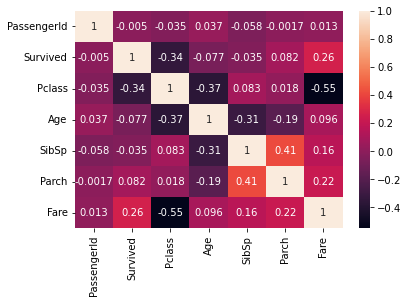

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(data.corr(),annot=True)
plt.show()

#### b. Bivariat

In [19]:
# Hubungan 'Sex' dan 'Survived'
data_ct_sex = pd.crosstab(data['Sex'], data['Survived'],margins=True)
data_ct_sex.style.background_gradient(cmap='summer')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [20]:
# Hubungan 'PClass' dan 'Survived'
data_ct_pclass = pd.crosstab(data['Pclass'], data['Survived'],margins=True)
data_ct_pclass.style.background_gradient(cmap='summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [21]:
# Hubungan 'Embarked' dan 'Survived'
data_ct_embarked = pd.crosstab(data['Embarked'], data['Survived'],margins=True)
data_ct_embarked.style.background_gradient(cmap='summer')

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [22]:
# Hubungan 'Sibsp' dan 'Survived'
data_ct_sibsp = pd.crosstab(data['SibSp'], data['Survived'],margins=True)
data_ct_sibsp.style.background_gradient(cmap='summer')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [23]:
# Hubungan 'Parch' dan 'Survived'
data_ct_parch = pd.crosstab(data['Parch'], data['Survived'],margins=True)
data_ct_parch.style.background_gradient(cmap='summer_r')

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


### 2. Visualisasi

#### a. Data Univariat diskrit/kategorik

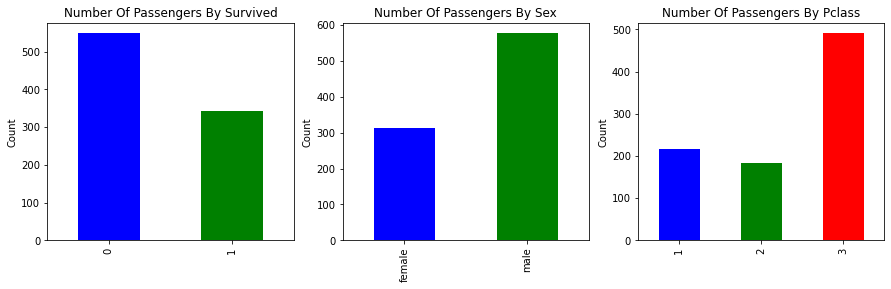

In [24]:
# Kolom 'Survived', 'Sex', dan 'Pclass'

f,ax=plt.subplots(1,3,figsize=(15,4))

# subplot 1
data['Survived'].value_counts().sort_index().plot.bar(color=['blue','green'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Survived')
ax[0].set_ylabel('Count')


# subplot 2 
data['Sex'].value_counts().sort_index().plot.bar(color=['blue','green'],ax=ax[1])
ax[1].set_title('Number Of Passengers By Sex')
ax[1].set_ylabel('Count')

# subplot 3 
data['Pclass'].value_counts().sort_index().plot.bar(color=['blue','green','red'],ax=ax[2])
ax[2].set_title('Number Of Passengers By Pclass')
ax[2].set_ylabel('Count')

# show
plt.show()

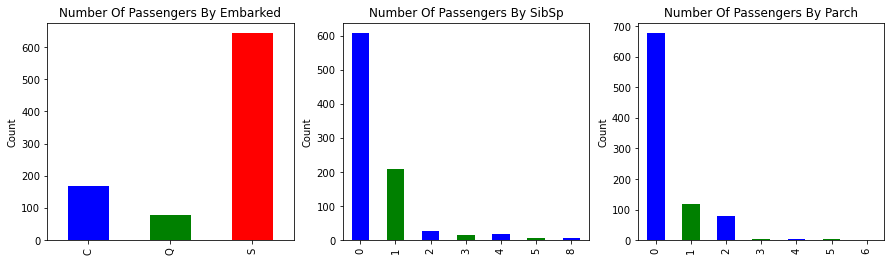

In [25]:
# Kolom 'Embarked', 'Sibsp', dan 'Parch'


f,ax=plt.subplots(1,3,figsize=(15,4))

# subplot 1 
data['Embarked'].value_counts().sort_index().plot.bar(color=['blue','green','red','yellow'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Embarked')
ax[0].set_ylabel('Count')

# subplot 1
data['SibSp'].value_counts().sort_index().plot.bar(color=['blue','green'],ax=ax[1])
ax[1].set_title('Number Of Passengers By SibSp')
ax[1].set_ylabel('Count')


# subplot 2 
data['Parch'].value_counts().sort_index().plot.bar(color=['blue','green'],ax=ax[2])
ax[2].set_title('Number Of Passengers By Parch')
ax[2].set_ylabel('Count')

# show
plt.show()

#### b. Data Univariat kontinu

Text(0.5, 1.0, 'Fare')

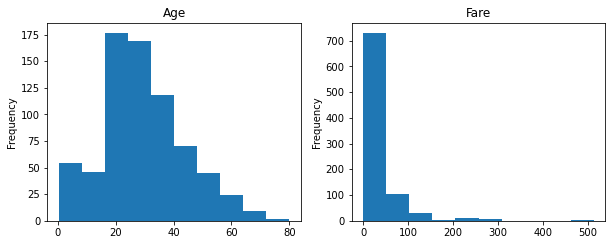

In [26]:
# Kolom 'Age' dan 'Fare'

f,ax=plt.subplots(figsize=(10,8))

plt.subplot(2,2,1)
data.Age.plot.hist()
plt.title('Age')

plt.subplot(2,2,2)
data.Fare.plot.hist()
plt.title('Fare')

#### c. Pencilan (*outlier*)

Text(0.5, 1.0, 'Fare')

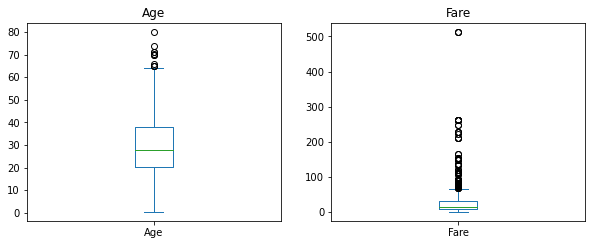

In [27]:
# Pencilan 'Age' dan 'Fare'
f,ax=plt.subplots(figsize=(10,8))

plt.subplot(2,2,1)
data['Age'].plot.box()
plt.title('Age')

plt.subplot(2,2,2)
data['Fare'].plot.box()
plt.title('Fare')

c:\Users\aldip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aldip\AppData\Local\Temp\ipykernel_21600\337711324.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


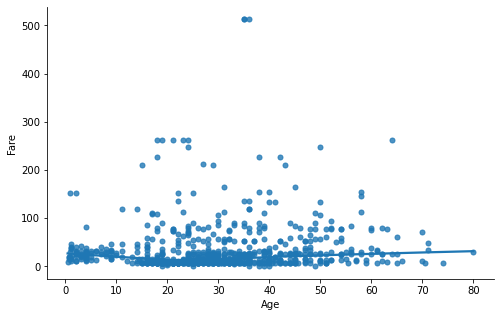

In [29]:
# 'Fare' vs 'Age'
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(data['Age'], data['Fare'],  scatter_kws = {'s': 25}, lowess=True)
sns.despine()
fig.show()

#### d. Data Bivariat 

c:\Users\aldip\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Age'>

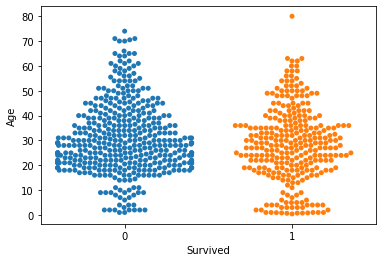

In [30]:
# 'Age' vs 'Survived'
sns.swarmplot(x="Survived", y="Age", data = data)

c:\Users\aldip\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\aldip\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

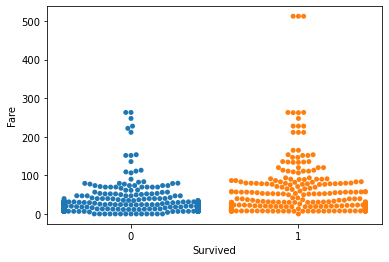

In [31]:
# 'Fare' vs 'Survived'
sns.swarmplot(x="Survived", y="Fare", data = data)

c:\Users\aldip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\aldip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\aldip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


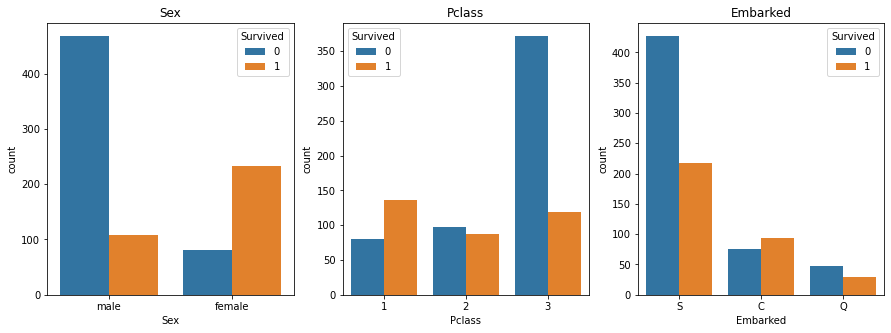

In [32]:
#'Sex' vs 'Survived', 'Pclass' vs 'Survived', dan 'Embarked' vs 'Survived' 

f,ax=plt.subplots(1,3,figsize=(15,5))

# subplot 1
sns.countplot('Sex',hue='Survived',data=data, ax=ax[0])
ax[0].set_title('Sex')

# subplot 2
sns.countplot('Pclass',hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Pclass')

# subplot 3
sns.countplot('Embarked',hue='Survived',data=data, ax=ax[2])
ax[2].set_title('Embarked')

# show
plt.show()

c:\Users\aldip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\aldip\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


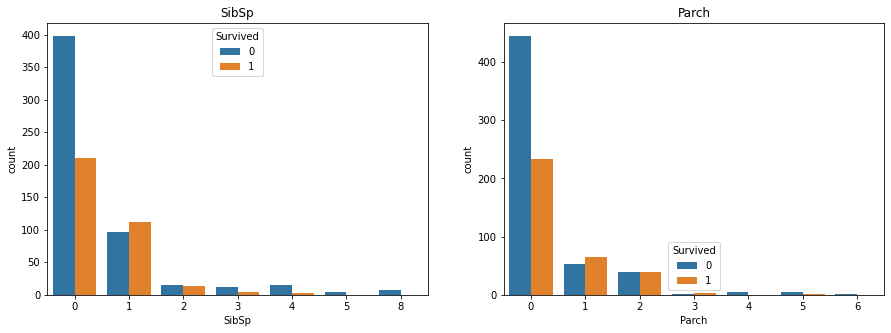

In [33]:
#'Sibsp' vs 'Survived' dan 'Parch' vs 'Survived'

f,ax=plt.subplots(1,2,figsize=(15,5))

# subplot 1
sns.countplot('SibSp',hue='Survived',data=data, ax=ax[0])
ax[0].set_title('SibSp')

# subplot 2
sns.countplot('Parch',hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Parch')

# show
plt.show()

c:\Users\aldip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

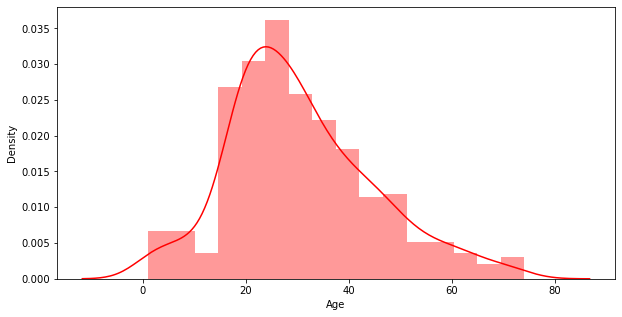

In [34]:
# 'Age' vs 'Not Survived'
plt.figure(figsize=(10,5))
sns.distplot(data.Age[data.Survived == 0], color = 'red', label = 'not survive')

In [ ]:
# 'Age' vs 'Survived'
plt.figure(figsize=(10,5))
sns.distplot(data.Age[data.Survived == 1], color = 'green', label = 'survive')

In [ ]:
# 'Age' vs 'Survived' and 'NotSurvived'

plt.figure(figsize=(10,5))

sns.distplot(data.Age[data.Survived == 0], color = 'red', label = 'not survive')
sns.distplot(data.Age[data.Survived == 1], color = 'green', label = 'survive')

### 3. Uji Asumsi

#### a. Normalitas Variabel diskrit/kategorik

In [36]:
from scipy.stats import chi2_contingency
  
def chi_test(data):    
    # defining the table
    stat, p, dof, expected = chi2_contingency(data)

    # interpret p-value
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

chi_test(data_ct_sex)
chi_test(data_ct_pclass)
chi_test(data_ct_embarked)
chi_test(data_ct_sibsp)
chi_test(data_ct_parch)

p value is 1.0036732821369117e-55
Dependent (reject H0)
p value is 6.258462423531468e-20
Dependent (reject H0)
p value is 0.00018045058101554055
Dependent (reject H0)
p value is 0.0006709654974933421
Dependent (reject H0)
p value is 0.014554047586837713
Dependent (reject H0)


#### a. Normalitas Variabel kontinu

c:\Users\aldip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

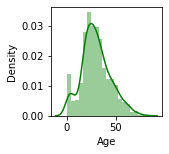

In [37]:
# Age

plt.figure(figsize=(2,2))
sns.distplot(data.Age, color = "green")

c:\Users\aldip\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

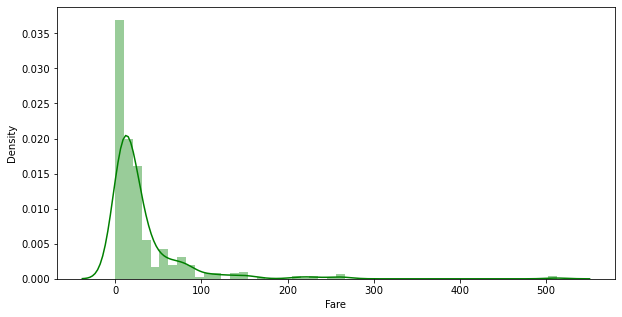

In [38]:
# Fare

plt.figure(figsize=(10,5))
sns.distplot(data.Fare, color = "green")

<details>
Kesimpulan sementara:

> 1. jumlah penumpang 'survived' lebih sedikit daripada 'unsurvived'
2. jumlah penumpang 'male' lebih banyak daripada penumpang 'female'
3. jumlah penumpang kelas 3 lebih banyak daripada kelas lainnya
4. jumlah penumpang sendirian lebih banyak dari pada yang keluarga dan saudara
5. jumlah penumpang dengan 'Embarked' Southampton lebih banyak daripada embarked lainnya
6. penumpang paling banyak berkisar pada usia 20 - 40 tahun
7. terdapat data outlier pada fitur 'Age' dan fitur 'Fare'
8. data pada fitur 'Age' dan 'Fare' mempunyai sebaran data tidak normal
9. *Feature Enginering*. Kemungkinan modifikasi kolom untuk mencari hubungan 'Survived':
    * 'SibSp' dapat digunakan untuk membuat kelompok, kemungkinan berkorelasi dengan 'Survived'
    * 'Parch' dapat digunakan untuk membuat fitur keluarga, kemungkinan berkorelasi dengan 'Survived'
    * 'Name' dapat dilakukan ekstraksi untuk mengeluarkan titel
    * 'Age' dapat dikelompokkan menjadi ordinal kategori
    * 'Fare' dapat dikelompokkan menjadi ordinal kategori
10. Dari 'Sex', 'Age', dan 'PClass' dapat dirumuskan hipotesis bahwa: Perempuan, anak-anak, orang kaya lebih mungkin untuk bertahan hidup.
</details>

# Additional Tools
Note: Kalau waktu mencukupi.

Terdapat beberapa tools yang bisa dipakai untuk melakukan EDA. Salah satu yang bisa membantu adalah Bamboolib.

In [1]:
#!pip install bamboolib #kalau misalkan belum terinstall
import bamboolib as bam
data

ModuleNotFoundError: No module named 'bamboolib'

In [ ]:
import plotly.express as px
fig = px.scatter(data.dropna(subset=['Age']), x='Age', y='Fare')
fig

In [ ]:
data